## Stat652_Homework 04
- Author: "Rohit Shelar"
- date: "12/03/2021"

### Problems:
- 11.7 Exercises: Problem 6a, Run Models 6. Naive Bayes, using training and test datasets, as described in part c of the problem.
- 11.7 Exercises: Problem 6b, Run Models 4. Random Forest, using training and test datasets, as described in part c of the problem.
- Perform the SMS spam filtering analysis from Lantz. Produce a report explaining the data, the analysis, and the findings. - Organize you report using the Five Steps. - Be sure to include: 1. Show the prediction that the algorithm produced. 2. Give the Accuracy of the predictions. 3. Include the confusion matrix.

### Answer: Code and Comments :
- 11.7 Exercises: Problem 6a Naive Bayes
- 11.7 Exercises: Problem 6b Random Forest

In [1]:
# Import required packages
import pandas as pd
import warnings; warnings.simplefilter('ignore')
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
# Step-01 : Loading The NHANES Dataset
import pandas as pd
df = pd.read_csv("NHANES.csv")
print(df.columns)
df.head(3)

Index(['Unnamed: 0', 'ID', 'SurveyYr', 'Gender', 'Age', 'AgeDecade',
       'AgeMonths', 'Race1', 'Race3', 'Education', 'MaritalStatus', 'HHIncome',
       'HHIncomeMid', 'Poverty', 'HomeRooms', 'HomeOwn', 'Work', 'Weight',
       'Length', 'HeadCirc', 'Height', 'BMI', 'BMICatUnder20yrs', 'BMI_WHO',
       'Pulse', 'BPSysAve', 'BPDiaAve', 'BPSys1', 'BPDia1', 'BPSys2', 'BPDia2',
       'BPSys3', 'BPDia3', 'Testosterone', 'DirectChol', 'TotChol',
       'UrineVol1', 'UrineFlow1', 'UrineVol2', 'UrineFlow2', 'Diabetes',
       'DiabetesAge', 'HealthGen', 'DaysPhysHlthBad', 'DaysMentHlthBad',
       'LittleInterest', 'Depressed', 'nPregnancies', 'nBabies', 'Age1stBaby',
       'SleepHrsNight', 'SleepTrouble', 'PhysActive', 'PhysActiveDays',
       'TVHrsDay', 'CompHrsDay', 'TVHrsDayChild', 'CompHrsDayChild',
       'Alcohol12PlusYr', 'AlcoholDay', 'AlcoholYear', 'SmokeNow', 'Smoke100',
       'Smoke100n', 'SmokeAge', 'Marijuana', 'AgeFirstMarij', 'RegularMarij',
       'AgeRegMarij', 'HardD

,Unnamed: 0,ID,SurveyYr,Gender,Age,AgeDecade,AgeMonths,Race1,Race3,Education,...,RegularMarij,AgeRegMarij,HardDrugs,SexEver,SexAge,SexNumPartnLife,SexNumPartYear,SameSex,SexOrientation,PregnantNow
0,1,51624,2009_10,male,34,30-39,409.0,White,NaN,High School,...,No,NaN,Yes,Yes,16.0,8.0,1.0,No,Heterosexual,NaN
1,2,51624,2009_10,male,34,30-39,409.0,White,NaN,High School,...,No,NaN,Yes,Yes,16.0,8.0,1.0,No,Heterosexual,NaN
2,3,51624,2009_10,male,34,30-39,409.0,White,NaN,High School,...,No,NaN,Yes,Yes,16.0,8.0,1.0,No,Heterosexual,NaN


In [3]:
# Step-02 - Data Preprocessing

In [4]:
# selecting desired columns from whole dataset
data = df[['Age', 'AgeMonths', 'HHIncomeMid', 'Poverty', 'HomeRooms', 'Weight', 'Length', 'HeadCirc', 'Height', 'BMI', 'Pulse', 'BPSysAve', 'BPDiaAve', 'BPSys1', 'BPDia1', 'BPSys2', 'BPDia2', 'BPSys3', 'BPDia3', 'Testosterone', 'DirectChol', 'TotChol', 'UrineVol1', 'UrineFlow1', 'UrineVol2', 'UrineFlow2', 'DiabetesAge', 'DaysPhysHlthBad', 'nPregnancies', 'nBabies', 'Age1stBaby', 'PhysActiveDays','TVHrsDay', 'CompHrsDay','SleepTrouble']]

In [5]:
print('Length of dataset: ', len(data))

Length of dataset:  10000


In [6]:
print('SleepTrouble Column Distribution')
data['SleepTrouble'].value_counts()

SleepTrouble Column Distribution


No     5799
Yes    1973
Name: SleepTrouble, dtype: int64

In [7]:
data_sleeptrouble = data[~data['SleepTrouble'].isna()]
missing_sleeptrouble = data[data['SleepTrouble'].isna()]
print('Dataset after removing missing entries in label column: ',len(data_sleeptrouble))
print('Dataset without label (Can be used for prediction): ',len(missing_sleeptrouble))

Dataset after removing missing entries in label column:  7772
Dataset without label (Can be used for prediction):  2228


In [8]:
# Number of Null Values in each column
data_sleeptrouble.isna().sum()

Age                   0
AgeMonths          3999
HHIncomeMid         672
Poverty             597
HomeRooms            64
Weight               66
Length             7772
HeadCirc           7772
Height               60
BMI                  72
Pulse               282
BPSysAve            293
BPDiaAve            293
BPSys1              570
BPDia1              570
BPSys2              454
BPDia2              454
BPSys3              437
BPDia3              437
Testosterone       4214
DirectChol          427
TotChol             427
UrineVol1           105
UrineFlow1          532
UrineVol2          6539
UrineFlow2         6541
DiabetesAge        7155
DaysPhysHlthBad     795
nPregnancies       5168
nBabies            5356
Age1stBaby         5888
PhysActiveDays     3896
TVHrsDay           3931
CompHrsDay         3929
SleepTrouble          0
dtype: int64

In [9]:
# Droping columns with more than 50% missing values
data_sleeptrouble = data_sleeptrouble.drop(columns=['AgeMonths','Length','HeadCirc','Testosterone',
                                                   'UrineVol2','UrineFlow2','DiabetesAge','nPregnancies',
                                                    'nBabies', 'Age1stBaby', 'PhysActiveDays', 'TVHrsDay',
                                                    'CompHrsDay'])

In [10]:
# Null count on remaining columns
data_sleeptrouble.isna().sum()

Age                  0
HHIncomeMid        672
Poverty            597
HomeRooms           64
Weight              66
Height              60
BMI                 72
Pulse              282
BPSysAve           293
BPDiaAve           293
BPSys1             570
BPDia1             570
BPSys2             454
BPDia2             454
BPSys3             437
BPDia3             437
DirectChol         427
TotChol            427
UrineVol1          105
UrineFlow1         532
DaysPhysHlthBad    795
SleepTrouble         0
dtype: int64

In [11]:
# Filling the missing values with mean value of respective columns

data_sleeptrouble_variables =  data_sleeptrouble.drop(columns='SleepTrouble')
data_sleeptrouble_variables = data_sleeptrouble_variables.apply(lambda x: x.fillna(x.mean()),axis=0)
data_sleeptrouble_variables['SleepTrouble'] = pd.Series(data_sleeptrouble['SleepTrouble'])
data_sleeptrouble = data_sleeptrouble_variables
data_sleeptrouble.isna().sum()

Age                0
HHIncomeMid        0
Poverty            0
HomeRooms          0
Weight             0
Height             0
BMI                0
Pulse              0
BPSysAve           0
BPDiaAve           0
BPSys1             0
BPDia1             0
BPSys2             0
BPDia2             0
BPSys3             0
BPDia3             0
DirectChol         0
TotChol            0
UrineVol1          0
UrineFlow1         0
DaysPhysHlthBad    0
SleepTrouble       0
dtype: int64

In [12]:
from sklearn import preprocessing
# Clean Dataframe with no missing values 
data_sleeptrouble.head()

,Age,HHIncomeMid,Poverty,HomeRooms,Weight,Height,BMI,Pulse,BPSysAve,BPDiaAve,...,BPSys2,BPDia2,BPSys3,BPDia3,DirectChol,TotChol,UrineVol1,UrineFlow1,DaysPhysHlthBad,SleepTrouble
0,34,30000.0,1.36,6.0,87.4,164.7,32.22,70.0,113.0,85.0,...,114.0,88.0,112.0,82.0,1.29,3.49,352.0,1.018502,0.0,Yes
1,34,30000.0,1.36,6.0,87.4,164.7,32.22,70.0,113.0,85.0,...,114.0,88.0,112.0,82.0,1.29,3.49,352.0,1.018502,0.0,Yes
2,34,30000.0,1.36,6.0,87.4,164.7,32.22,70.0,113.0,85.0,...,114.0,88.0,112.0,82.0,1.29,3.49,352.0,1.018502,0.0,Yes
4,49,40000.0,1.91,5.0,86.7,168.4,30.57,86.0,112.0,75.0,...,108.0,74.0,116.0,76.0,1.16,6.70,77.0,0.094000,0.0,Yes
7,45,87500.0,5.00,6.0,75.7,166.7,27.24,62.0,118.0,64.0,...,118.0,68.0,118.0,60.0,2.12,5.82,106.0,1.116000,0.0,No


### Naive Bayes :

In [15]:
# Model Creation, Training and Prediction

In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
# Scaling the dataset using MinMaxScaler

from sklearn.model_selection import train_test_split
X =  data_sleeptrouble.drop(columns='SleepTrouble')
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)
y = data_sleeptrouble['SleepTrouble'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
# Model declaration
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

----------------------- Classification Report ------------------------

              precision    recall  f1-score   support

           0       0.78      0.88      0.83      1472
           1       0.35      0.20      0.25       471

    accuracy                           0.72      1943
   macro avg       0.56      0.54      0.54      1943
weighted avg       0.67      0.72      0.69      1943

----------------------- Confusion Matrix -----------------------------



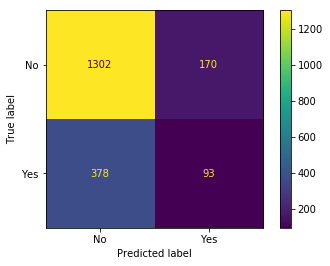

In [21]:
_y_pred=[0 if x == 'No' else 1 for x in y_pred]
_y_test=[0 if x == 'No' else 1 for x in y_test]
from sklearn import metrics

print('----------------------- Classification Report ------------------------\n')
print(metrics.classification_report(_y_test, _y_pred, labels=[0, 1]))

print('----------------------- Confusion Matrix -----------------------------\n')
%matplotlib inline
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gnb, X_test, y_test)  

### Random Forest :

In [34]:
# Desired columns inclusing column : SleepHrsNight

data = df[['Age','SleepHrsNight','AgeMonths', 'HHIncomeMid', 'Poverty', 'HomeRooms', 'Weight', 'Length', 'HeadCirc', 'Height', 'BMI', 'Pulse', 'BPSysAve', 'BPDiaAve', 'BPSys1', 'BPDia1', 'BPSys2', 'BPDia2', 'BPSys3', 'BPDia3', 'Testosterone', 'DirectChol', 'TotChol', 'UrineVol1', 'UrineFlow1', 'UrineVol2', 'UrineFlow2', 'DiabetesAge', 'DaysPhysHlthBad', 'nPregnancies', 'nBabies', 'Age1stBaby', 'PhysActiveDays','TVHrsDay', 'CompHrsDay','SleepTrouble']]

In [35]:
data_sleeptrouble = data[~data['SleepTrouble'].isna()]
missing_sleeptrouble = data[data['SleepTrouble'].isna()]

print("Length dataset after removing missing entries in label data: ",len(data_sleeptrouble))
print("Length dataset with missing entries in label data (can be used for prediction):",len(missing_sleeptrouble))

Length dataset after removing missing entries in label data:  7772
Length dataset with missing entries in label data (can be used for prediction): 2228


In [36]:
data_sleeptrouble.isna().sum()

Age                   0
SleepHrsNight        17
AgeMonths          3999
HHIncomeMid         672
Poverty             597
HomeRooms            64
Weight               66
Length             7772
HeadCirc           7772
Height               60
BMI                  72
Pulse               282
BPSysAve            293
BPDiaAve            293
BPSys1              570
BPDia1              570
BPSys2              454
BPDia2              454
BPSys3              437
BPDia3              437
Testosterone       4214
DirectChol          427
TotChol             427
UrineVol1           105
UrineFlow1          532
UrineVol2          6539
UrineFlow2         6541
DiabetesAge        7155
DaysPhysHlthBad     795
nPregnancies       5168
nBabies            5356
Age1stBaby         5888
PhysActiveDays     3896
TVHrsDay           3931
CompHrsDay         3929
SleepTrouble          0
dtype: int64

In [37]:
# Dropping all the columns with more than 50% missing values 

data_sleeptrouble = data_sleeptrouble.drop(columns=['AgeMonths','Length','HeadCirc','Testosterone',
                                                   'UrineVol2','UrineFlow2','DiabetesAge','nPregnancies',
                                                    'nBabies', 'Age1stBaby', 'PhysActiveDays', 'TVHrsDay',
                                                    'CompHrsDay'])

In [38]:
data_sleeptrouble.isna().sum()

Age                  0
SleepHrsNight       17
HHIncomeMid        672
Poverty            597
HomeRooms           64
Weight              66
Height              60
BMI                 72
Pulse              282
BPSysAve           293
BPDiaAve           293
BPSys1             570
BPDia1             570
BPSys2             454
BPDia2             454
BPSys3             437
BPDia3             437
DirectChol         427
TotChol            427
UrineVol1          105
UrineFlow1         532
DaysPhysHlthBad    795
SleepTrouble         0
dtype: int64

In [39]:
# Filling the missing values with mean value of respective columns

data_sleeptrouble_variables =  data_sleeptrouble.drop(columns='SleepTrouble')
data_sleeptrouble_variables = data_sleeptrouble_variables.apply(lambda x: x.fillna(x.mean()),axis=0)
data_sleeptrouble_variables['SleepTrouble'] = pd.Series(data_sleeptrouble['SleepTrouble'])
data_sleeptrouble = data_sleeptrouble_variables
data_sleeptrouble.isna().sum()

Age                0
SleepHrsNight      0
HHIncomeMid        0
Poverty            0
HomeRooms          0
Weight             0
Height             0
BMI                0
Pulse              0
BPSysAve           0
BPDiaAve           0
BPSys1             0
BPDia1             0
BPSys2             0
BPDia2             0
BPSys3             0
BPDia3             0
DirectChol         0
TotChol            0
UrineVol1          0
UrineFlow1         0
DaysPhysHlthBad    0
SleepTrouble       0
dtype: int64

In [40]:
from sklearn import preprocessing
# Clean Dataframe
data_sleeptrouble.head()

,Age,SleepHrsNight,HHIncomeMid,Poverty,HomeRooms,Weight,Height,BMI,Pulse,BPSysAve,...,BPSys2,BPDia2,BPSys3,BPDia3,DirectChol,TotChol,UrineVol1,UrineFlow1,DaysPhysHlthBad,SleepTrouble
0,34,4.0,30000.0,1.36,6.0,87.4,164.7,32.22,70.0,113.0,...,114.0,88.0,112.0,82.0,1.29,3.49,352.0,1.018502,0.0,Yes
1,34,4.0,30000.0,1.36,6.0,87.4,164.7,32.22,70.0,113.0,...,114.0,88.0,112.0,82.0,1.29,3.49,352.0,1.018502,0.0,Yes
2,34,4.0,30000.0,1.36,6.0,87.4,164.7,32.22,70.0,113.0,...,114.0,88.0,112.0,82.0,1.29,3.49,352.0,1.018502,0.0,Yes
4,49,8.0,40000.0,1.91,5.0,86.7,168.4,30.57,86.0,112.0,...,108.0,74.0,116.0,76.0,1.16,6.70,77.0,0.094000,0.0,Yes
7,45,8.0,87500.0,5.00,6.0,75.7,166.7,27.24,62.0,118.0,...,118.0,68.0,118.0,60.0,2.12,5.82,106.0,1.116000,0.0,No


In [41]:
print("SleepTrouble Distribution")
data_sleeptrouble['SleepTrouble'].value_counts()

SleepTrouble Distribution


No     5799
Yes    1973
Name: SleepTrouble, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
_X =  data_sleeptrouble.drop(columns='SleepTrouble')
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(_X)
# X = _X
y = data_sleeptrouble['SleepTrouble'].values
y = np.array([0 if x == 'No' else 1 for x in y])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [44]:
from sklearn.ensemble import RandomForestClassifier
RFclf = RandomForestClassifier(n_estimators=100, criterion="gini",bootstrap=True, random_state=42)
RFclf = RFclf.fit(X_train, y_train)
y_pred = RFclf.predict(X_test) 

----------------------- Classification Report ------------------------

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1472
           1       0.92      0.62      0.74       471

    accuracy                           0.90      1943
   macro avg       0.91      0.80      0.84      1943
weighted avg       0.90      0.90      0.89      1943

-------------------------- Confusion matrix --------------------------



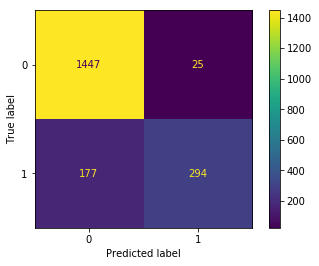

In [45]:
from sklearn import metrics

print('----------------------- Classification Report ------------------------\n')

print(metrics.classification_report(y_test, y_pred))

print('-------------------------- Confusion matrix --------------------------\n')
%matplotlib inline
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(RFclf, X_test, y_test)  

### SMS spam filtering analysis :

In [2]:
# Data Loading
df =  pd.read_csv('sms_spam.csv')
df.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# Data basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
type    5574 non-null object
text    5574 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
# Checking for null value count
df.isna().sum()

type    0
text    0
dtype: int64

ham     4827
spam     747
Name: type, dtype: int64


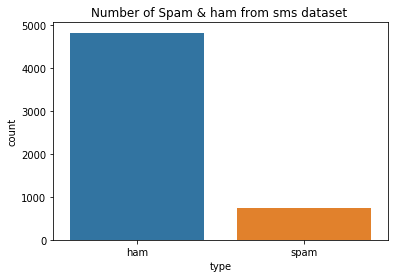

In [5]:
# Plot to show distrubution of Dataset with Ham and Spam 
print(df['type'].value_counts())
sns.countplot(x='type', data = df)
plt.title('Number of Spam & ham from sms dataset ')
plt.show()

In [6]:
# Divide the data in training and test dataset

from sklearn.model_selection import train_test_split
X= df.text
y= df.type
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [7]:
# using CountVectorizer to Text data into Vectors
from sklearn.feature_extraction.text import CountVectorizer
vect= CountVectorizer(stop_words="english")
vect.fit(X_train)
#print(vect.vocabulary_)

CountVectorizer(stop_words='english')

In [8]:
# Transform Data into Vectors

X_train_transformed= vect.transform(X_train)
X_test_transformed = vect.transform(X_test)

In [9]:
# Model Using naive bayes BernoulliNB algorithm 
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(X_train_transformed, y_train)
proba= bnb.predict_proba(X_test_transformed)
y_pred= bnb.predict(X_test_transformed)

from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.9734576757532282

----------------------- Classification Report ------------------------

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1203
        spam       0.99      0.81      0.89       191

    accuracy                           0.97      1394
   macro avg       0.98      0.91      0.94      1394
weighted avg       0.97      0.97      0.97      1394

-------------------------- Confusion matrix --------------------------



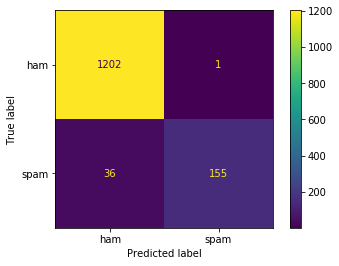

In [12]:
from sklearn import metrics
print('----------------------- Classification Report ------------------------\n')
print(metrics.classification_report(y_test, y_pred))

print('-------------------------- Confusion matrix --------------------------\n')
%matplotlib inline
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(bnb, X_test_transformed, y_test)  

In [13]:
data = pd.DataFrame({'Text': X_test,'Actual Type':y_test, 'Predicted Type':y_pred})

In [14]:
data.to_csv('sms_prediction.csv')

In [15]:
# Data Prediction 
data

,Text,Actual Type,Predicted Type
3690,You still coming tonight?,ham,ham
3527,"""HEY BABE! FAR 2 SPUN-OUT 2 SPK AT DA MO... DE...",ham,ham
724,Ya even those cookies have jelly on them,ham,ham
3370,Sorry i've not gone to that place. I.ll do so ...,ham,ham
468,When are you going to ride your bike?,ham,ham
5412,"Daddy, shu shu is looking 4 u... U wan me 2 te...",ham,ham
4362,"Don't Think About ""What u Have Got"" Think Abou...",ham,ham
4241,The LAY MAN! Just to let you know you are miss...,ham,ham
5442,Thank you. do you generally date the brothas?,ham,ham
5309,What you did in leave.,ham,ham
